In [42]:
#Imports.
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, r2_score
from joblib import dump, load
import matplotlib.pyplot as plt
import datetime as dt

In [43]:
#Takes UKDALE activations csv and reads as a pandas Dataframe.
DW = read_csv(r'...path...\nilm_analyzer_EM401\Large Data\Load Profile Data\UK1-5_R1-5-7_DW_july_2014.csv', header=[0])
WM = read_csv(r'...path...\nilm_analyzer_EM401\Large Data\Load Profile Data\UK1_R1-5-7_WM_july_2014.csv', header=[0])
agg = read_csv(r'...path...\nilm_analyzer_EM401\Large Data\Load Profile Data\UK_R_agg_july_2014.csv', header=[0])

In [44]:
DW.head()

,time,aggregate,dishwasher
0,1.404169e+09,213.0,0.0
1,1.404169e+09,216.0,0.0
2,1.404169e+09,216.0,0.0
3,1.404169e+09,214.0,0.0
4,1.404169e+09,217.0,1.0


In [45]:
DWdata = DW.values
WMdata = WM.values
aggdata = agg.values

In [46]:
print(DWdata)

[[1.40416920e+09 2.13000000e+02 0.00000000e+00]
 [1.40416921e+09 2.16000000e+02 0.00000000e+00]
 [1.40416921e+09 2.16000000e+02 0.00000000e+00]
 ...
 [1.40684758e+09 1.27000000e+02 0.00000000e+00]
 [1.40684759e+09 1.27000000e+02 0.00000000e+00]
 [1.40684759e+09 1.27000000e+02 0.00000000e+00]]


In [47]:
DWvar, DWdes = DWdata[:,:-1], DWdata[:,-1]
WMvar, WMdes = WMdata[:,:-1], WMdata[:,-1]
aggvar, aggdes = aggdata[:,:-1], aggdata[:,-1]

In [48]:
print(DWvar.shape, DWdes.shape)
print(WMvar.shape, WMdes.shape)
print(aggvar.shape, aggdes.shape)

(1785600, 2) (1785600,)
(1785600, 2) (1785600,)
(1785600, 3) (1785600,)


In [49]:
DWvar_train, DWvar_test, DWdes_train, DWdes_test = train_test_split(DWvar, DWdes, test_size=0.33, random_state=1)
WMvar_train, WMvar_test, WMdes_train, WMdes_test = train_test_split(WMvar, WMdes, test_size=0.33, random_state=1)
aggvar_train, aggvar_test, aggdes_train, aggdes_test = train_test_split(aggvar, aggdes, test_size=0.33, random_state=1)

In [50]:
print(DWvar_train.shape, DWvar_test.shape, DWdes_train.shape, DWdes_test.shape)
print(WMvar_train.shape, WMvar_test.shape, WMdes_train.shape, WMdes_test.shape)
print(aggvar_train.shape, aggvar_test.shape, aggdes_train.shape, aggdes_test.shape)

(1196352, 2) (589248, 2) (1196352,) (589248,)
(1196352, 2) (589248, 2) (1196352,) (589248,)
(1196352, 3) (589248, 3) (1196352,) (589248,)


In [51]:
DWmodel = RandomForestRegressor(n_estimators = 75, random_state=15)
DWmodel.fit(DWvar_train, DWdes_train)

RandomForestRegressor(n_estimators=75, random_state=15)

In [52]:
WMmodel = RandomForestRegressor(n_estimators = 75, random_state=15)
WMmodel.fit(WMvar_train, WMdes_train)

RandomForestRegressor(n_estimators=75, random_state=15)

In [53]:
aggmodel = RandomForestRegressor(n_estimators = 125, random_state=15)
aggmodel.fit(aggvar_train, aggdes_train)

RandomForestRegressor(n_estimators=125, random_state=15)

In [54]:
DWdeshat = DWmodel.predict(DWvar_test)

In [55]:
WMdeshat = WMmodel.predict(WMvar_test)

In [56]:
aggdeshat = aggmodel.predict(aggvar_test)

In [57]:
DWmae = mean_absolute_error(DWdes_test, DWdeshat)
print('DWMAE: %.3f' % DWmae)
WMmae = mean_absolute_error(WMdes_test, WMdeshat)
print('WMMAE: %.3f' % WMmae)
aggmae = mean_absolute_error(aggdes_test, aggdeshat)
print('aggMAE: %.3f' % aggmae)

DWMAE: 3.636
WMMAE: 4.083
aggMAE: 197.102


In [58]:
DWr2 = r2_score(DWdes_test, DWdeshat)
print('DWR2: %.4f' % DWr2)
WMr2 = r2_score(WMdes_test, WMdeshat)
print('WMR2: %.4f' % WMr2)
aggr2 = r2_score(aggdes_test, aggdeshat)
print('aggr2: %.4f' % aggr2)

DWR2: 0.8764
WMR2: 0.8363
aggr2: 0.4894


In [59]:
DW_df = pd.DataFrame(DWdeshat, columns = ['dishwasher'])
WM_df = pd.DataFrame(WMdeshat)
agg_df = pd.DataFrame(aggdeshat)

In [60]:
DW_df['washing_machine'] = WM_df

In [61]:
DW_df['aggregate'] = agg_df

In [62]:
predicted = DW_df

In [63]:
predicted.head()

,dishwasher,washing_machine,aggregate
0,0.844444,0.00,942.008456
1,0.000000,42.52,0.000000
2,0.439068,0.00,175.044657
3,0.000000,0.00,381.455026
4,0.000000,0.00,267.478208


In [64]:
index = pd.DataFrame(DWvar_test)

In [65]:
index.drop(columns = [1], inplace = True)

In [66]:
predicted['time'] = index

In [67]:
predicted.head()

,dishwasher,washing_machine,aggregate,time
0,0.844444,0.00,942.008456,1.406114e+09
1,0.000000,42.52,0.000000,1.405936e+09
2,0.439068,0.00,175.044657,1.406377e+09
3,0.000000,0.00,381.455026,1.405902e+09
4,0.000000,0.00,267.478208,1.406796e+09


In [68]:
def from_timestamp(time):
    t = dt.datetime.fromtimestamp(time)
    return t

In [69]:
predicted['time'] = predicted['time'].apply(from_timestamp)

In [70]:
predicted.sort_values(by = 'time', ascending= True, inplace= True)

In [71]:
predicted.head()

,dishwasher,washing_machine,aggregate,time
519516,0.000000,0.0,474.165265,2014-07-01 00:00:00
445656,0.026667,0.0,474.165265,2014-07-01 00:00:00
425369,0.594095,0.0,474.165265,2014-07-01 00:00:12
449146,0.080000,0.0,474.165265,2014-07-01 00:00:18
114775,4.980000,0.0,399.211844,2014-07-01 00:00:24


In [72]:
predcited = predicted.groupby(['time']).mean()

In [73]:
predicted.head()

,dishwasher,washing_machine,aggregate,time
519516,0.000000,0.0,474.165265,2014-07-01 00:00:00
445656,0.026667,0.0,474.165265,2014-07-01 00:00:00
425369,0.594095,0.0,474.165265,2014-07-01 00:00:12
449146,0.080000,0.0,474.165265,2014-07-01 00:00:18
114775,4.980000,0.0,399.211844,2014-07-01 00:00:24


In [74]:
predicted.set_index(keys = 'time', inplace= True)

In [75]:
predicted = predicted.reindex(columns = ['aggregate', 'dishwasher', 'washing_machine'])

In [76]:
predicted.head()

,aggregate,dishwasher,washing_machine
time,,,
2014-07-01 00:00:00,474.165265,0.000000,0.0
2014-07-01 00:00:00,474.165265,0.026667,0.0
2014-07-01 00:00:12,474.165265,0.594095,0.0
2014-07-01 00:00:18,474.165265,0.080000,0.0
2014-07-01 00:00:24,399.211844,4.980000,0.0


In [77]:
date = 27

<Axes: title={'center': 'Synthesised Daily Load Profile 27/07'}, xlabel='Time of Day [Day Hour:Minute]', ylabel='Active Power [W]'>

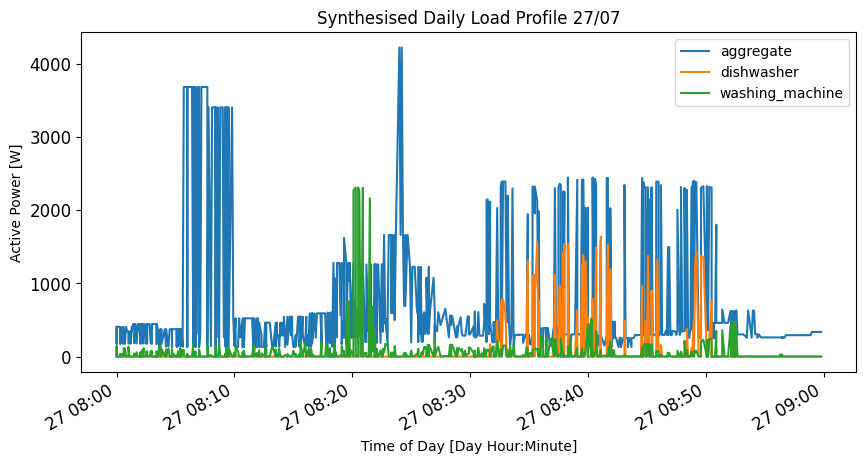

In [96]:
predicted.loc['2014-07-{} 08:00:00'.format(date):'2014-07-{} 09:00:00'.format(date)].plot(figsize=(10,5), title='Synthesised Daily Load Profile {}/07'.format(date), xlabel= 'Time of Day [Day Hour:Minute]', ylabel= 'Active Power [W]', fontsize = 12)

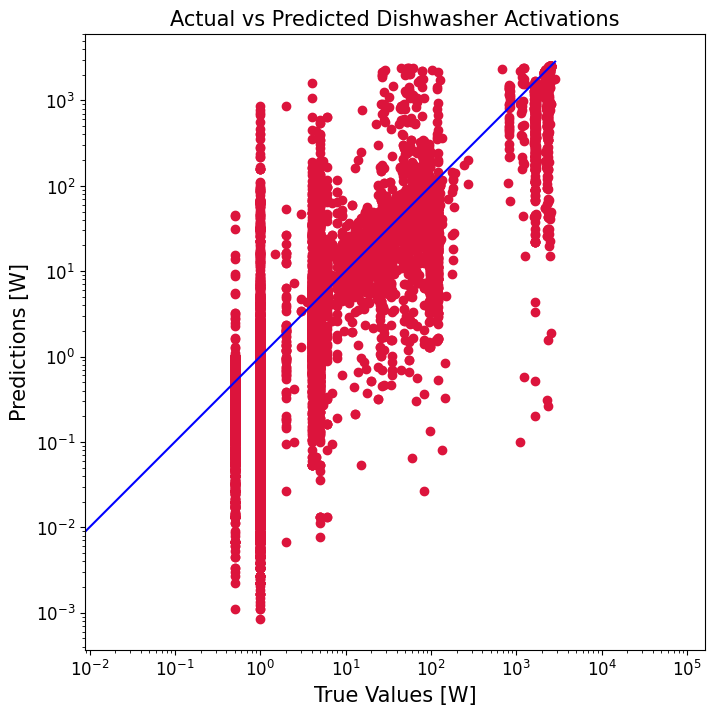

In [91]:
plt.figure(figsize=(8,8))
plt.scatter(DWdes_test, DWdeshat, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(DWdeshat), max(DWdes_test))
p2 = min(min(DWdeshat), min(DWdes_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values [W]', fontsize=15)
plt.ylabel('Predictions [W]', fontsize=15)
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.axis('equal')
plt.title('Actual vs Predicted Dishwasher Activations', fontsize = 15)
plt.show()

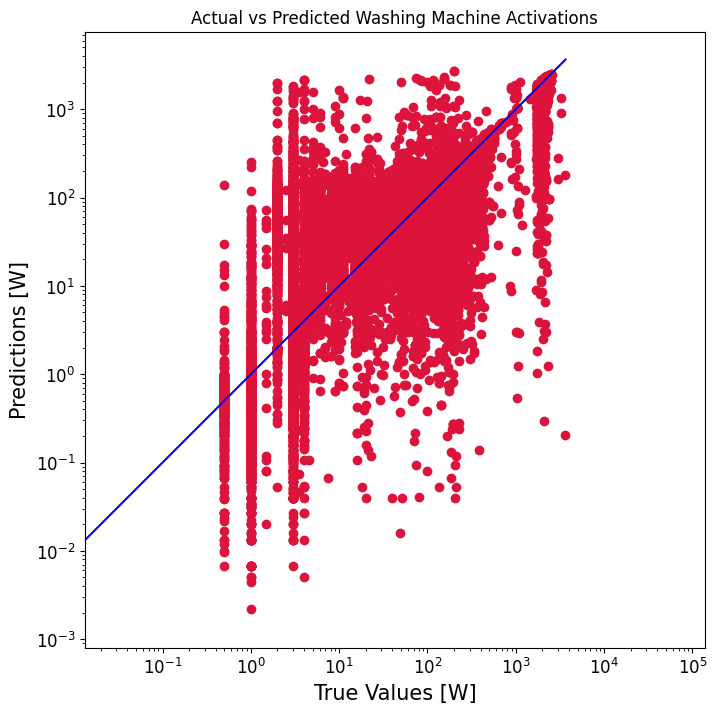

In [92]:
plt.figure(figsize=(8,8))
plt.scatter(WMdes_test, WMdeshat, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(WMdeshat), max(WMdes_test))
p2 = min(min(WMdeshat), min(WMdes_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values [W]', fontsize=15)
plt.ylabel('Predictions [W]', fontsize=15)
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.axis('equal')
plt.title('Actual vs Predicted Washing Machine Activations')
plt.show()

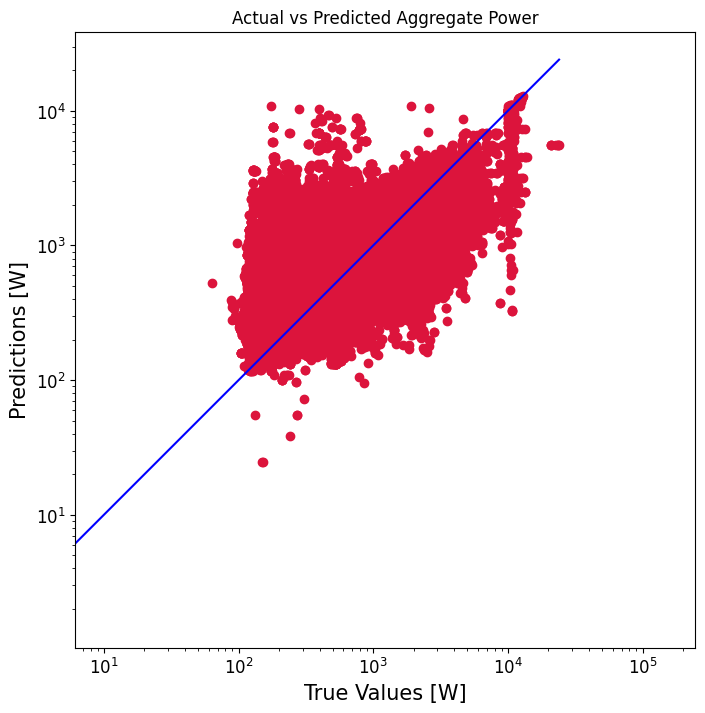

In [93]:
plt.figure(figsize=(8,8))
plt.scatter(aggdes_test, aggdeshat, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(aggdeshat), max(aggdes_test))
p2 = min(min(aggdeshat), min(aggdes_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values [W]', fontsize=15)
plt.ylabel('Predictions [W]', fontsize=15)
plt.xticks(fontsize =12)
plt.yticks(fontsize =12)
plt.axis('equal')
plt.title('Actual vs Predicted Aggregate Power')
plt.show()